<a href="https://colab.research.google.com/github/varofr/proyecto_inferencia/blob/main/2DO_ENTREGABLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


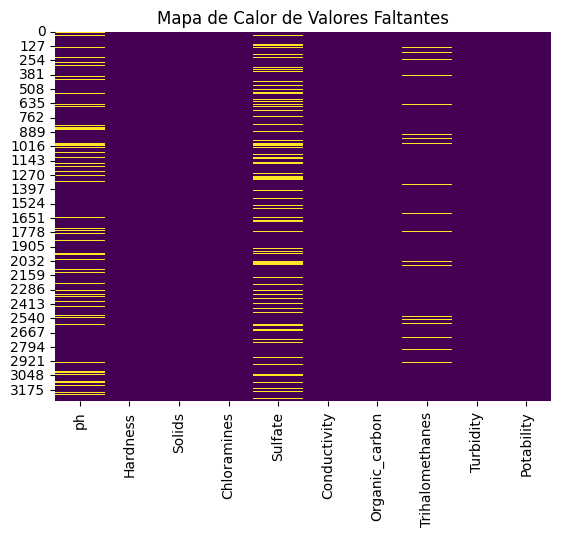

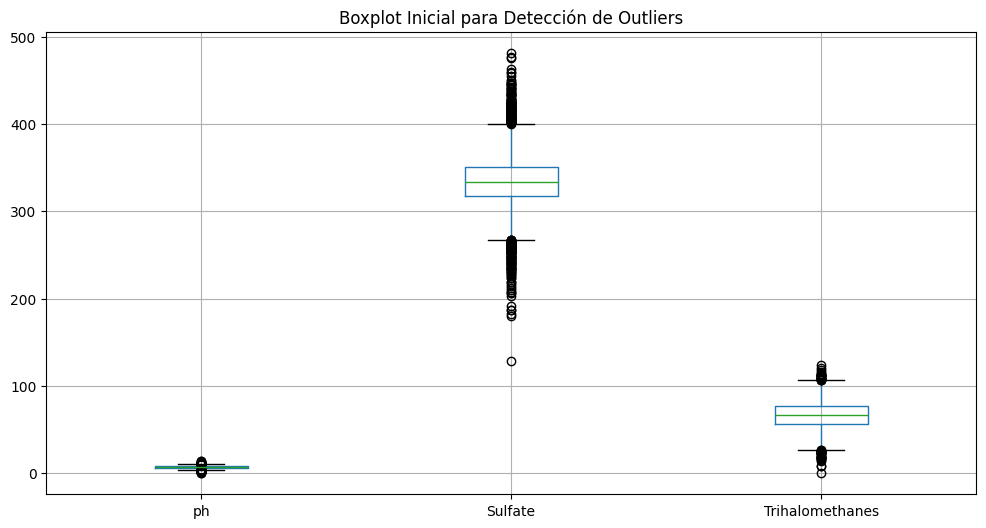

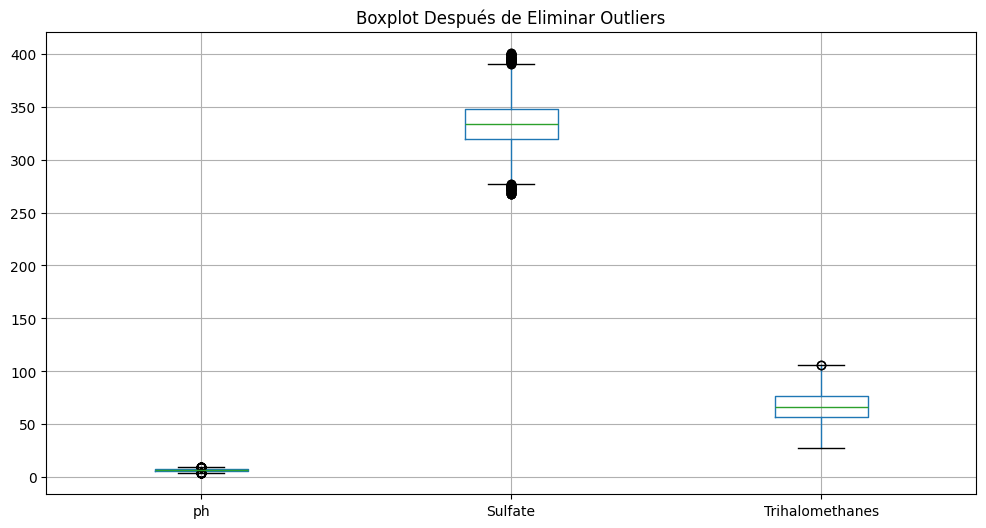

Estadísticas Descriptivas:
                 ph     Hardness        Solids  Chloramines      Sulfate  \
count  2666.000000  2666.000000   2666.000000  2666.000000  2666.000000   
mean      7.066770   197.051982  21486.829049     7.111191   333.581956   
std       1.215605    28.366547   7924.092724     1.413403    26.507237   
min       3.902476   118.988579    320.942611     3.194969   267.202392   
25%       6.348026   179.010144  15596.765222     6.188575   319.481628   
50%       7.036752   197.561474  20583.142637     7.114169   333.073546   
75%       7.792306   215.744047  26742.195037     8.053054   347.921235   
max      10.252816   275.886513  44652.363872    11.086526   400.274579   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2666.000000     2666.000000      2666.000000  2666.000000  2666.000000  
mean     425.811207       14.305441        66.449377     3.961669     0.373218  
std       79.988085        3.217070        14.898614 

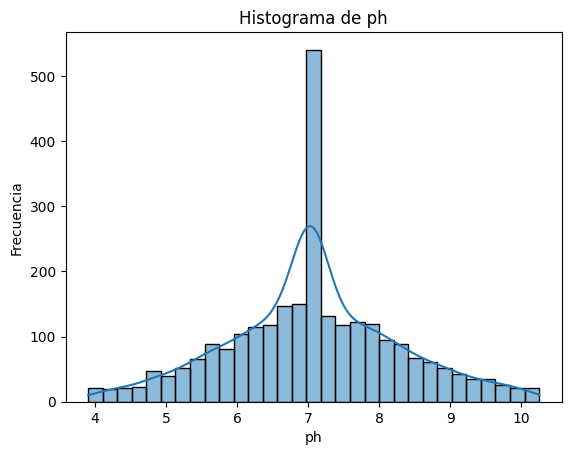

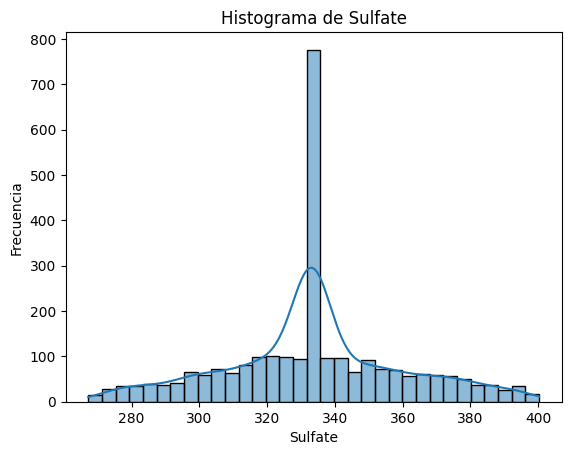

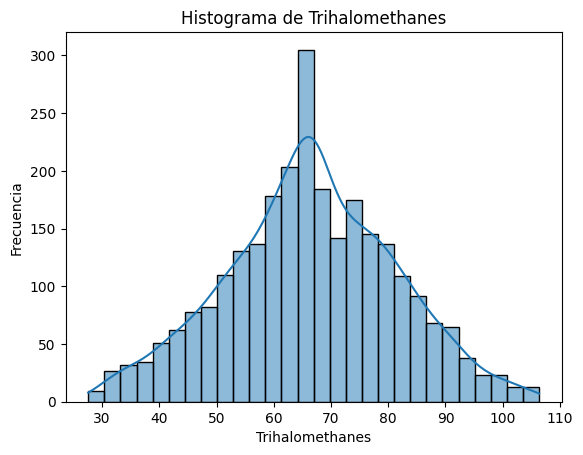

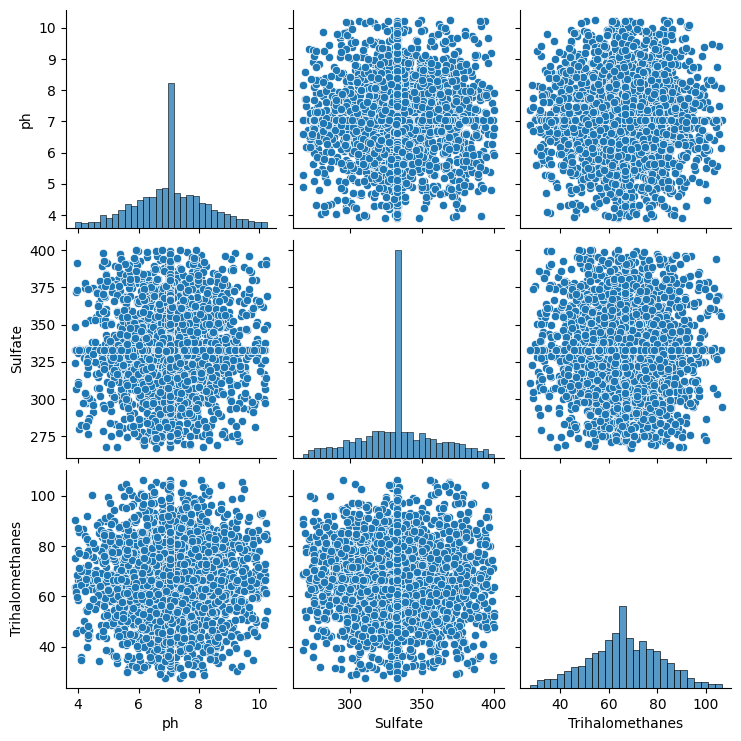

Matriz de Correlación:
                        ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.131282 -0.086986    -0.062773  0.016465   
Hardness         0.131282  1.000000 -0.045552    -0.035832 -0.027797   
Solids          -0.086986 -0.045552  1.000000    -0.040392 -0.109980   
Chloramines     -0.062773 -0.035832 -0.040392     1.000000  0.024519   
Sulfate          0.016465 -0.027797 -0.109980     0.024519  1.000000   
Conductivity     0.002192 -0.030415  0.007087    -0.015277 -0.005927   
Organic_carbon   0.026461  0.012463  0.026793    -0.000684 -0.007304   
Trihalomethanes  0.009309 -0.007059 -0.024442     0.016538 -0.022391   
Turbidity       -0.042813 -0.022362  0.022801    -0.005415 -0.017396   
Potability      -0.005499 -0.000710  0.005600     0.013195 -0.003876   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.002192        0.026461         0.009309  -0.042813   
Hardness            -0.030415

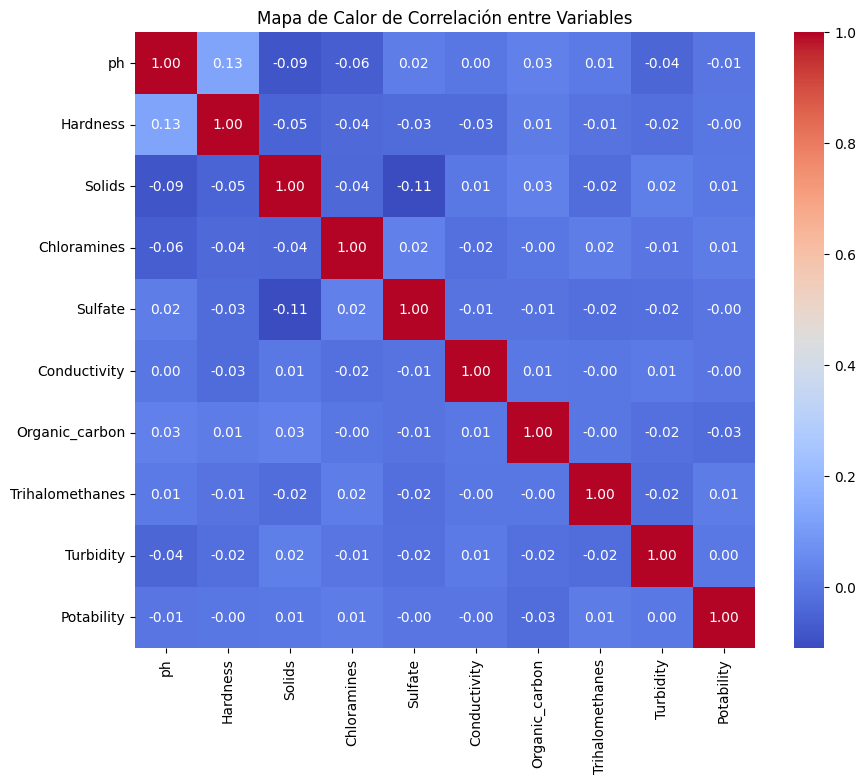

Shapiro-Wilk test para ph: Estadístico = 0.9866, p-valor = 0.0000
ph no tiene una distribución normal.

Shapiro-Wilk test para Sulfate: Estadístico = 0.9685, p-valor = 0.0000
Sulfate no tiene una distribución normal.

Shapiro-Wilk test para Trihalomethanes: Estadístico = 0.9964, p-valor = 0.0000
Trihalomethanes no tiene una distribución normal.



In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import shapiro
from google.colab import drive

# 1. Cargar los datos
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/water_potability.csv'
df = pd.read_csv(file_path)
water_potability = df.copy()

# 2. Limpieza de la Base de Datos

# a. Detección y Tratamiento de Valores Faltantes
# Visualizar la cantidad de valores faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de Calor de Valores Faltantes")
plt.show()

# Imputación de valores faltantes con mediana
df['ph'] = df['ph'].fillna(df['ph'].median())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())

# b. Identificación y Manejo de Outliers
# Visualización de outliers antes de la eliminación
columns_to_check = ['ph', 'Sulfate', 'Trihalomethanes']
df[columns_to_check].boxplot(figsize=(12, 6))
plt.title('Boxplot Inicial para Detección de Outliers')
plt.show()

# Eliminación de outliers usando el método IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualización de outliers después de la eliminación
df_cleaned[columns_to_check].boxplot(figsize=(12, 6))
plt.title('Boxplot Después de Eliminar Outliers')
plt.show()

# c. Estandarización de Formatos y Unidades
# Verifica si alguna columna requiere conversión de unidades (opcional según el dataset)

# d. Normalización y Estandarización de Variables
# Estandarización
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df_cleaned[columns_to_check]),
                               columns=columns_to_check)

# Normalización
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df_cleaned[columns_to_check]),
                             columns=columns_to_check)

# 3. Análisis Descriptivo Completo de los Datos

# a. Estadísticas Descriptivas Básicas
# Calcular estadísticas descriptivas
descriptive_stats = df_cleaned.describe()
print("Estadísticas Descriptivas:\n", descriptive_stats)

# Guardar estadísticas descriptivas en un archivo CSV
descriptive_stats.to_csv('descriptive_statistics.csv')

# b. Análisis Gráfico
# Histogramas de distribución
for column in columns_to_check:
    plt.figure()
    sns.histplot(df_cleaned[column], kde=True)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Diagramas de dispersión entre las variables seleccionadas
sns.pairplot(df_cleaned[columns_to_check])
plt.show()

# c. Correlaciones
# Matriz de correlación y mapa de calor
correlation_matrix = df_cleaned.corr()
print("Matriz de Correlación:\n", correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlación entre Variables")
plt.show()

# d. Evaluación de la Normalidad
# Prueba de Shapiro-Wilk para cada columna
for column in columns_to_check:
    stat, p_value = shapiro(df_cleaned[column])
    print(f"Shapiro-Wilk test para {column}: Estadístico = {stat:.4f}, p-valor = {p_value:.4f}")
    if p_value > 0.05:
        print(f"{column} parece tener una distribución normal.\n")
    else:
        print(f"{column} no tiene una distribución normal.\n")


Mejores Hiperparámetros: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 500}
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78       412
           1       0.65      0.34      0.44       244

    accuracy                           0.68       656
   macro avg       0.67      0.61      0.61       656
weighted avg       0.68      0.68      0.65       656



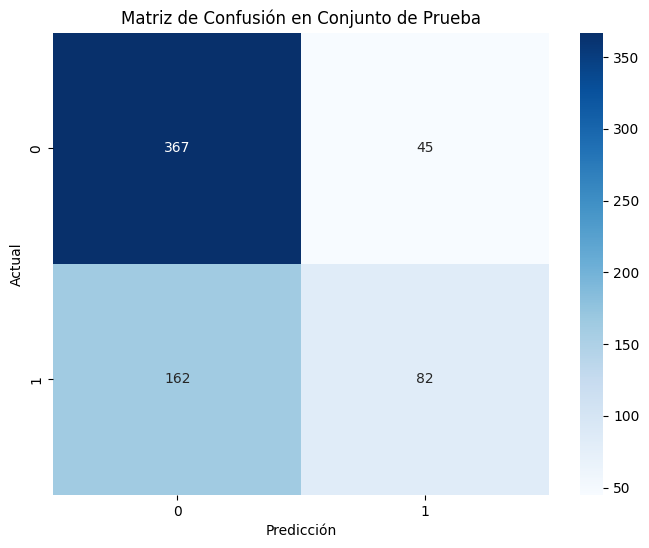

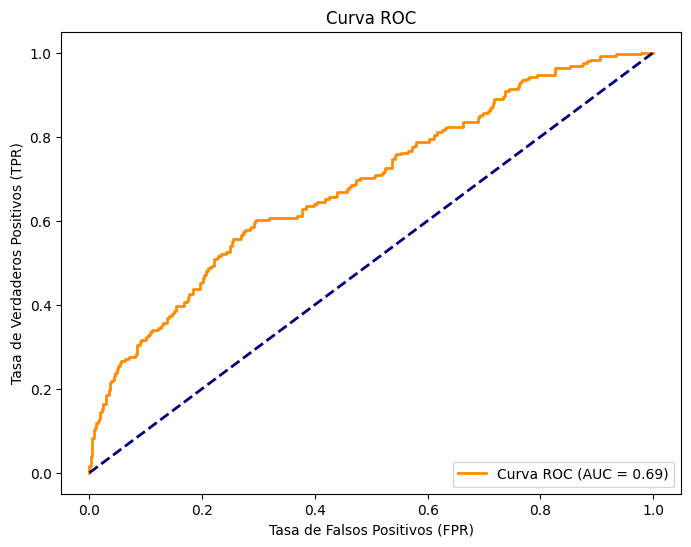

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# División de los Datos

X = df.drop(columns=['Potability'])  # Reemplaza 'Potability' con el nombre real si es necesario
y = df['Potability']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajuste de Hiperparámetros del Bosque Aleatorio usando GridSearchCV con un rango más amplio
param_grid = {
    'n_estimators': [100, 200, 300, 500],       # Número de árboles en el bosque
    'max_depth': [None, 20, 30, 40],            # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10]             # Número mínimo de muestras para dividir un nodo
}

# Configurar el modelo y el Grid Search para optimizar AUC
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc')  # Optimiza AUC
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
best_rf_model = grid_search.best_estimator_
print("Mejores Hiperparámetros:", grid_search.best_params_)

# Entrenamiento del Mejor Modelo
best_rf_model.fit(X_train, y_train)

# Evaluación del Modelo en el Conjunto de Prueba
# Realización de predicciones
y_pred = best_rf_model.predict(X_test)

# Imprimir el reporte de clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.title("Matriz de Confusión en Conjunto de Prueba")
plt.show()

# Curva ROC y AUC
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


Mejores Hiperparámetros: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.68      0.91      0.78       412
           1       0.66      0.29      0.40       244

    accuracy                           0.68       656
   macro avg       0.67      0.60      0.59       656
weighted avg       0.67      0.68      0.64       656



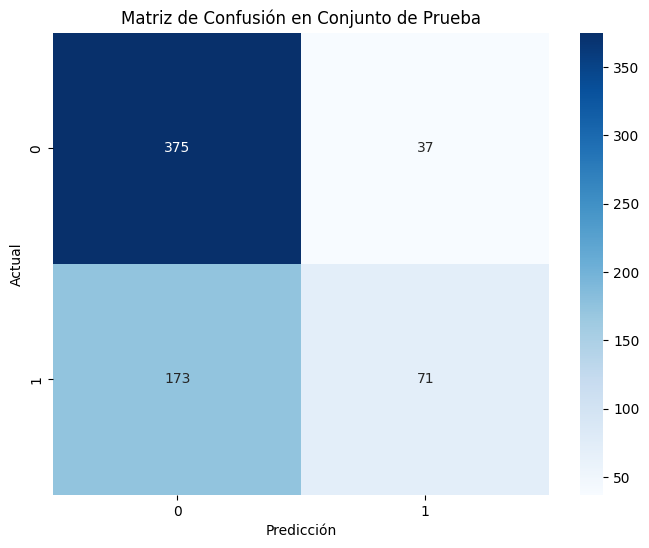

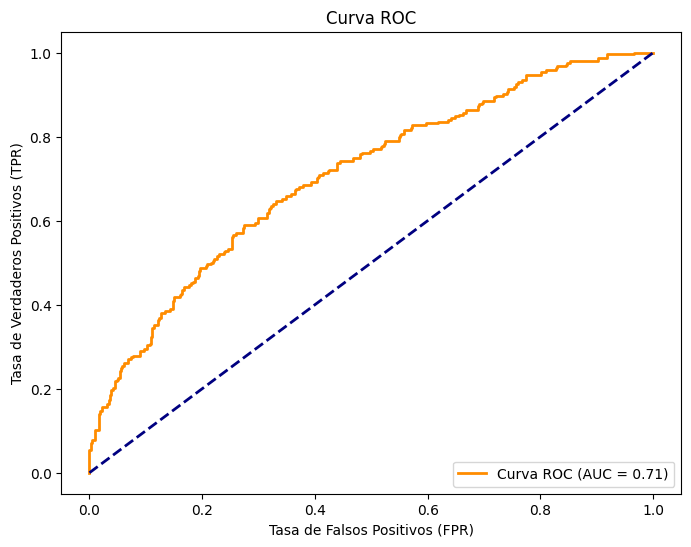

In [8]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# División de los Datos
X = df.drop(columns=['Potability'])
y = df['Potability']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuración de los Hiperparámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],    # Número de árboles
    'max_depth': [3, 5, 7],             # Profundidad máxima de cada árbol
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'subsample': [0.8, 1.0]             # Fracción de muestras usadas en cada árbol
}

# Configurar GridSearchCV para optimizar AUC
grid_search = GridSearchCV(estimator=XGBClassifier(eval_metric='logloss', random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
best_xgb_model = grid_search.best_estimator_
print("Mejores Hiperparámetros:", grid_search.best_params_)

# Entrenamiento del Mejor Modelo
best_xgb_model.fit(X_train, y_train)

# Evaluación del Modelo en el Conjunto de Prueba
# Realizar predicciones y calcular las probabilidades de la clase positiva
y_pred = best_xgb_model.predict(X_test)
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Reporte de Clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.title("Matriz de Confusión en Conjunto de Prueba")
plt.show()

# Curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
